<a href="https://colab.research.google.com/github/Marwanali12/DL-project/blob/main/SoftComputing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Heart_Disease_Prediction (1).csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# New section

In [5]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
df = df.dropna()


In [9]:
df.duplicated().sum()


0

In [10]:
df = df.drop_duplicates()


In [11]:
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.columns:
    df.loc[:, col] = encoder.fit_transform(df[col])

# Convert all columns to numeric df type
df = df.apply(pd.to_numeric)

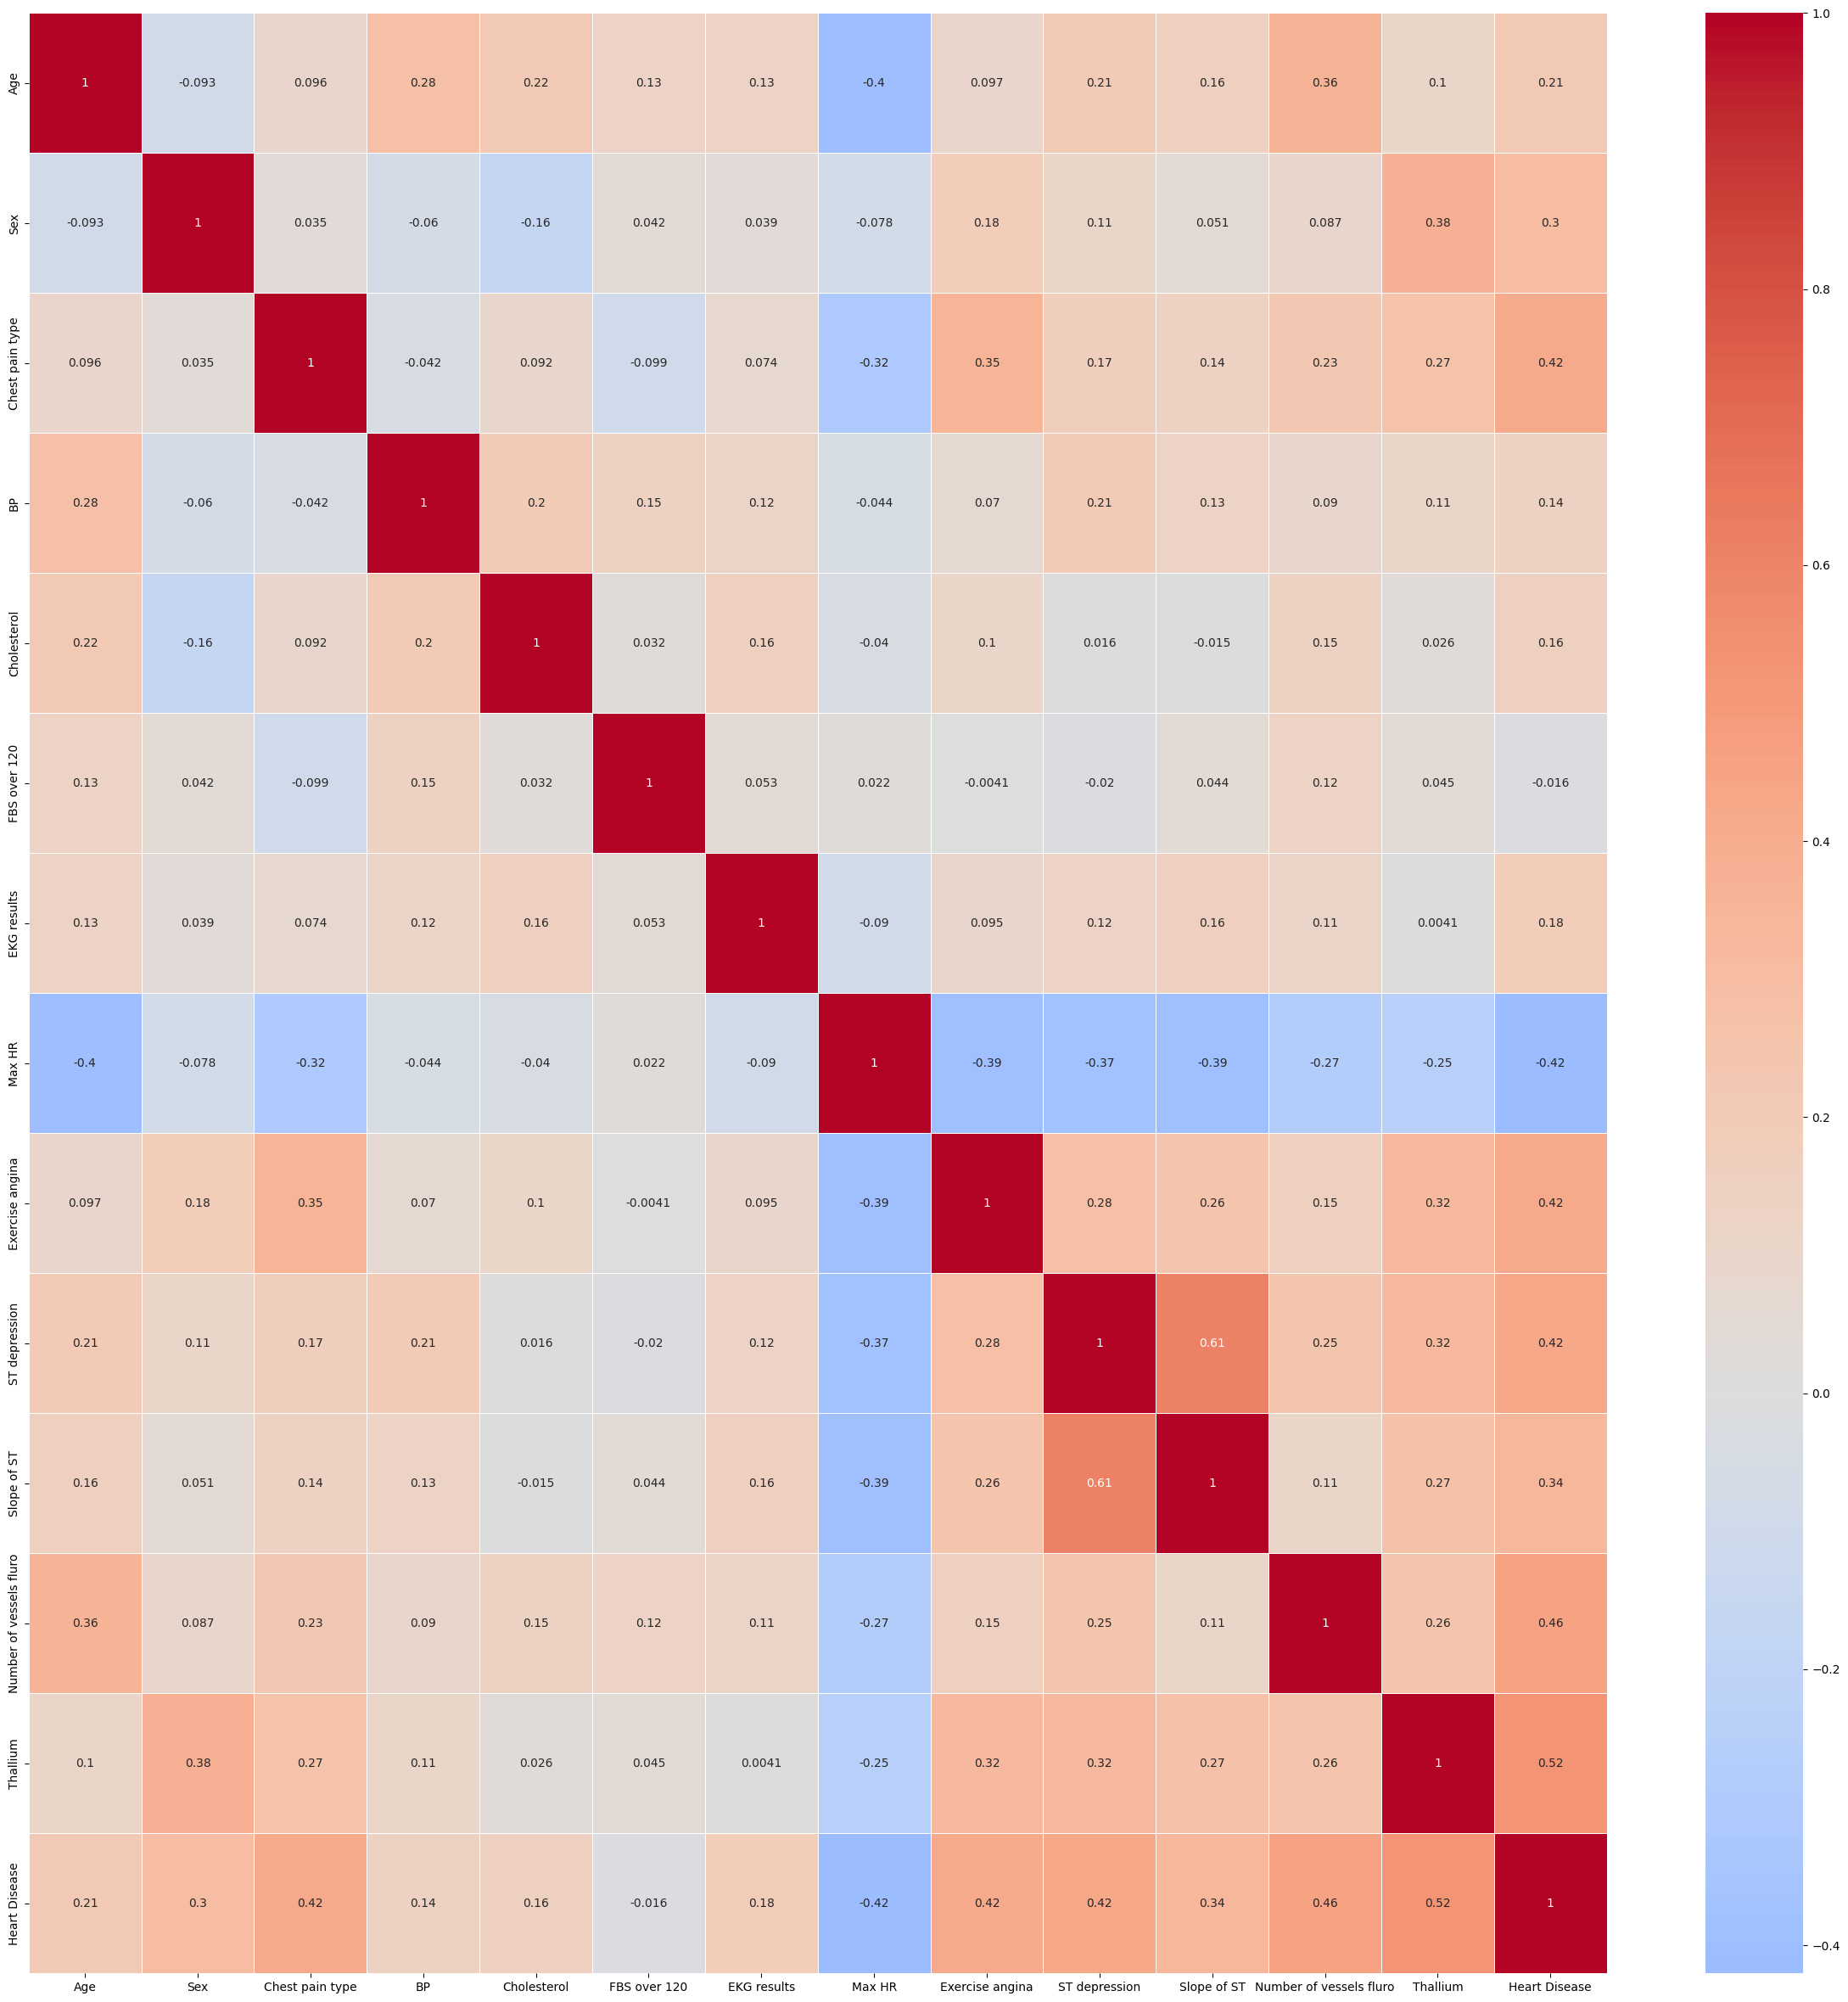

In [13]:
# Using Pearson Correlation
plt.figure(figsize=(30, 30))
cor = df.corr()
sns.heatmap(data=cor, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(["Heart Disease"], axis=1)
y = df["Heart Disease"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [15]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 270
Total # of sample in train dataset: 216
Total # of sample in test dataset: 54


In [16]:
# Assuming df is your DataFrame
numerical_features = X.select_dtypes(include=["int", "float"]).columns.tolist()

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features in the training set and transform them
X_train = scaler.fit_transform(X_train)

# Transform the numerical features in the test set using the scaler fitted on the training set
X_test = scaler.transform(X_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
def checkpoint_callback(
    filepath="best_model_checkpoint.h5",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1,
):
    checkpoint_callback = ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        mode=mode,
        save_best_only=save_best_only,
        verbose=verbose,
    )
    return checkpoint_callback


# Define early stopping criteria
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, verbose=0, restore_best_weights=True
)

In [20]:
import time


def create_model(input_size):
    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


# Function to train the model
def train_model(
    model,
    X_train,
    y_train,
    early_stopping_on=False,
    checkpoint_on=False,
    checkpoint_path=None,
):
    callbacks = []

    # Define checkpoint callback
    if checkpoint_on:
        # Create dynamic checkpoint directory if it doesn't exist
        # Add checkpoint callback
        checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_path, monitor="val_loss", save_best_only=True
        )
        callbacks.append(checkpoint_callback)

    # Add early stopping callback if enabled
    if early_stopping_on:
        callbacks.append(early_stopping)

    start_time = time.time()
    model.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=64,
        validation_split=0.2,
        callbacks=callbacks,
    )
    end_time = time.time()
    return end_time - start_time

In [21]:
# Define the ANN model and its path
ann_best_model_file_path = "heart_failure/models/ANN_best_model.h5"
ann_model = create_model(X_train.shape[1])

# Train the ANN model
ann_training_time = train_model(
    ann_model,
    X_train,
    y_train,
    checkpoint_on=True,
    checkpoint_path=ann_best_model_file_path,
)

Epoch 1/200
3/3 [==============================] - 2s 158ms/step - loss: 0.7122 - accuracy: 0.3372 - val_loss: 0.6895 - val_accuracy: 0.5682
Epoch 2/200
3/3 [==============================] - 0s 43ms/step - loss: 0.6930 - accuracy: 0.4709 - val_loss: 0.6718 - val_accuracy: 0.6591
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6776 - accuracy: 0.6250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 46ms/step - loss: 0.6789 - accuracy: 0.5581 - val_loss: 0.6561 - val_accuracy: 0.6818
Epoch 4/200
3/3 [==============================] - 0s 30ms/step - loss: 0.6675 - accuracy: 0.5872 - val_loss: 0.6400 - val_accuracy: 0.6818
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6544 - accuracy: 0.6163 - val_loss: 0.6234 - val_accuracy: 0.6591
Epoch 6/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6401 - accuracy: 0.6686 - val_loss: 0.6041 - val_accuracy: 0.6591
Epoch 7/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6229 - accuracy: 0.7209 - val_loss: 0.5813 - val_accuracy: 0.7727
Epoch 8/200
3/3 [==============================] - 0s 28ms/step - loss: 0.6043 - accuracy: 0.7442 - val_loss: 0.5561 - val_accuracy: 0.7727
Epoch 9/200
3/3 [==============================] - 0s 27ms/step - loss: 0.5822 - accuracy: 0.7558 - val_loss: 0.5307 - val_accuracy: 0.8182
Epoch 10/200
3/3 [==============

In [22]:
from keras.models import load_model

# Load a Keras model
ann_best_model = load_model(ann_best_model_file_path)
# Use the trained model to make predictions on the test data
ann_predictions = ann_best_model.predict(X_test)

# If your model outputs probabilities, you might need to convert them to class labels
# For example, if the output is probability of class 1, you can set a threshold to classify as class 1
threshold = 0.5
ann_prediction_class = (ann_predictions > threshold).astype(int)

2/2 [==============================] - 0s 6ms/step


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
ann_accuracy = accuracy_score(y_test, ann_prediction_class)
# Calculate precision
ann_precision = precision_score(y_test, ann_prediction_class)
# Calculate recall
ann_recall = recall_score(y_test, ann_prediction_class)
# Calculate F1-score
ann_f1 = f1_score(y_test, ann_prediction_class)

print("Accuracy:", ann_accuracy)
print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1-score:", ann_f1)

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.8333333333333334
F1-score: 0.816326530612245


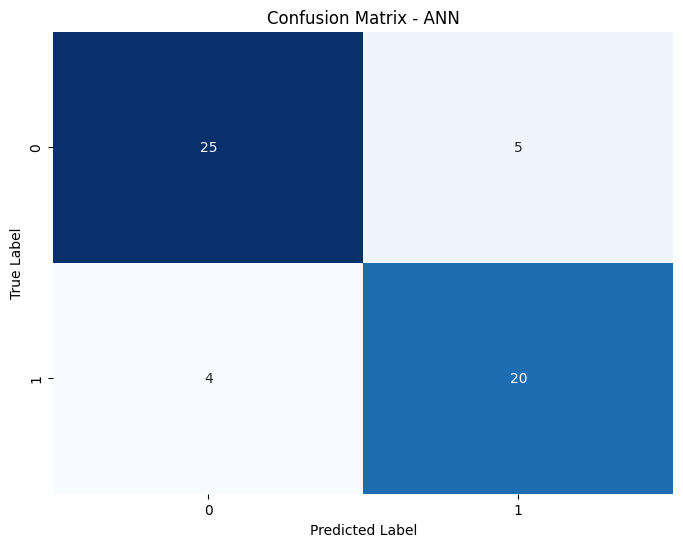

In [24]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_ann = confusion_matrix(y_test, ann_prediction_class)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00


In [26]:
import tensorflow as tf
import pygad
import numpy as np
import pandas as pd
from numpy.random import RandomState

In [27]:
seed = 1234
state = RandomState(seed)

In [28]:
def fitness_func(ga_instance, solution, solution_idx):
    selected_features_indices = np.where(solution == 1)[0]
    print(solution)
    X_train_selected = X_train[:, selected_features_indices]
    X_test_selected = X_test[:, selected_features_indices]

    # Get the number of selected features
    input_size = X_train_selected

    model = create_model(input_size.shape[1])  # Pass input size here
    model.fit(
        X_train_selected,
        y_train,
        epochs=200,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0,
    )

    accuracy = model.evaluate(X_test_selected, y_test, verbose=0)[1]
    print(accuracy)
    return accuracy

In [29]:
def on_generation(ga_instance):
    global last_fitness
    print(
        "Generation = {generation}".format(generation=ga_instance.generations_completed)
    )
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")

    last_fitness = ga_instance.best_solution()[1].copy()

In [30]:
last_fitness = 0
num_generations = 50
num_parents_mating = 4
pop_size = 8
num_features = X.shape[1]
gene_space = state.randint(0, 2, num_features)
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"

In [31]:
# Create an instance of the GA class
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    on_generation=on_generation,
    sol_per_pop=pop_size,
    num_genes=num_features,
    gene_space=gene_space,
    parent_selection_type=parent_selection_type,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [32]:
ga_instance.run()


[1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
0.7222222089767456
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
0.8148148059844971
[0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
0.7777777910232544
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.]
0.7407407164573669
[0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
0.7592592835426331
[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]
0.7592592835426331
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
0.7962962985038757
[1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
0.8333333134651184
[1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
0.7777777910232544
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
0.8333333134651184
[0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.]
0.7777777910232544
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.7962962985038757
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
0.8148148059844971
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
0.7962962985038757
[1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
0.7592592835426331
Generation = 1
[1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
0.7222222089767456
[1. 1. 1. 1. 1. 1. 0. 1. 

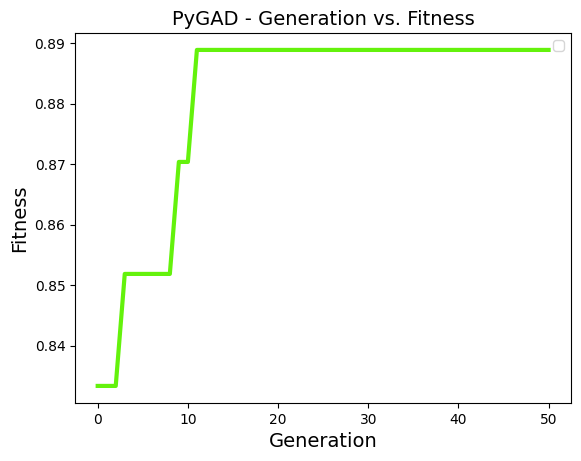

[1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
0.8333333134651184
[1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
0.8148148059844971
[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
0.8333333134651184
Feature of the best solution : [1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
Fitness value of the best solution = 0.8888888955116272
Index of the best solution : 0
Best fitness value reached after 11 generations.
Number of features selected = 9.0


In [33]:
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Feature of the best solution : {solution}".format(solution=solution))
print(
    "Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness
    )
)
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print(
        "Best fitness value reached after {best_solution_generation} generations.".format(
            best_solution_generation=ga_instance.best_solution_generation
        )
    )
print(f"Number of features selected = {sum(solution)}")

In [34]:
# Extract selected features based on global best position
ga_selected_features = np.where(solution > 0.5)[0]
# Train and evaluate model using selected features
X_train_ga_selected = X_train[:, ga_selected_features]
X_test_ga_selected = X_test[:, ga_selected_features]

ga_ann_best_model_file_path = "heart_failure/models/GA_ANN_best_model.h5"
ga_ann_model = create_model(X_train_ga_selected.shape[1])

# Train the ANN model
ga_ann_training_time = train_model(
    ga_ann_model,
    X_train_ga_selected,
    y_train,
    checkpoint_on=True,
    checkpoint_path=ga_ann_best_model_file_path),

Epoch 1/200
3/3 [==============================] - 3s 288ms/step - loss: 0.6813 - accuracy: 0.6163 - val_loss: 0.6587 - val_accuracy: 0.7955
Epoch 2/200
3/3 [==============================] - 0s 46ms/step - loss: 0.6605 - accuracy: 0.7500 - val_loss: 0.6399 - val_accuracy: 0.8182
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6431 - accuracy: 0.8281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 51ms/step - loss: 0.6400 - accuracy: 0.8430 - val_loss: 0.6203 - val_accuracy: 0.8409
Epoch 4/200
3/3 [==============================] - 0s 89ms/step - loss: 0.6211 - accuracy: 0.8314 - val_loss: 0.5995 - val_accuracy: 0.8864
Epoch 5/200
3/3 [==============================] - 0s 77ms/step - loss: 0.5993 - accuracy: 0.8547 - val_loss: 0.5764 - val_accuracy: 0.8409
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 0.5756 - accuracy: 0.8488 - val_loss: 0.5502 - val_accuracy: 0.8636
Epoch 7/200
3/3 [==============================] - 0s 62ms/step - loss: 0.5498 - accuracy: 0.8430 - val_loss: 0.5227 - val_accuracy: 0.8636
Epoch 8/200
3/3 [==============================] - 0s 74ms/step - loss: 0.5210 - accuracy: 0.8430 - val_loss: 0.4953 - val_accuracy: 0.8636
Epoch 9/200
3/3 [==============================] - 0s 75ms/step - loss: 0.4909 - accuracy: 0.8314 - val_loss: 0.4682 - val_accuracy: 0.8636
Epoch 10/200
3/3 [==============

In [ ]:
print("Genetic Algorithm Selected Features Indices:", ga_selected_features)
print("Genetic Algorithm Selected Features:", X.columns[ga_selected_features].tolist())

In [ ]:
ga_ann_best_model = load_model(ga_ann_best_model_file_path)
ga_ann_prediction = ga_ann_best_model.predict(X_test_ga_selected)

threshold = 0.5
ga_ann_prediction_class = (ga_ann_prediction > threshold).astype(int)

In [37]:
# Calculate accuracy
ga_ann_accuracy = accuracy_score(y_test, ga_ann_prediction_class)

# Calculate precision
ga_ann_precision = precision_score(y_test, ga_ann_prediction_class)

# Calculate recall
ga_ann_recall = recall_score(y_test, ga_ann_prediction_class)

# Calculate F1-score
ga_ann_f1 = f1_score(y_test, ga_ann_prediction_class)

print("Accuracy:", ga_ann_accuracy)
print("Precision:", ga_ann_precision)
print("Recall:", ga_ann_recall)
print("F1-score:", ga_ann_f1)

Accuracy: 0.8703703703703703
Precision: 0.8695652173913043
Recall: 0.8333333333333334
F1-score: 0.851063829787234


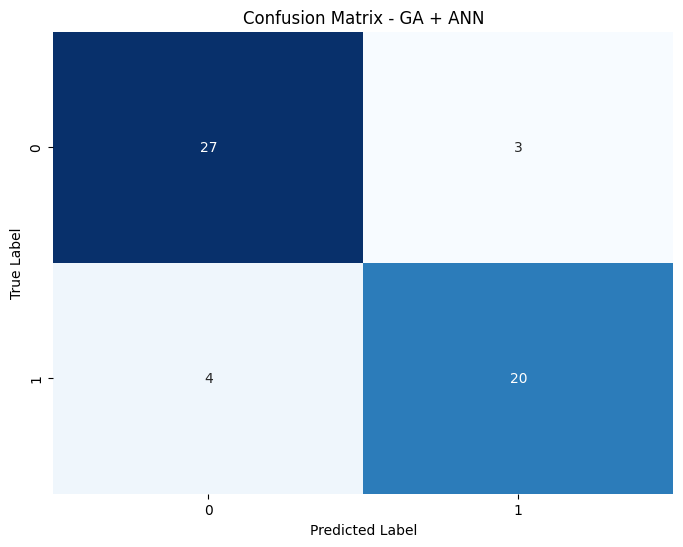

In [38]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_ga_ann = confusion_matrix(y_test, ga_ann_prediction_class)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ga_ann, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - GA + ANN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
ga_selected_features= ['Age', 'Chest pain type', 'EKG results', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [9]:
import pandas as pd

# Define the features
all_features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
                'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
                'ST depression', 'Slope of ST', 'Number of vessels fluro',
                'Thallium']

# Create an empty DataFrame to store the information
comparison_data = []

# Iterate through all features
for feature in all_features:

    ga_selected = 'Yes' if feature in ga_selected_features else 'No'
    comparison_data.append({'Feature': feature,
                            'GA Selected': ga_selected})

# Create a DataFrame from the data
comparison_table = pd.DataFrame(comparison_data)

# Display the comparison table
comparison_table

,Feature,GA Selected
0,Age,Yes
1,Sex,No
2,Chest pain type,Yes
3,BP,No
4,Cholesterol,No
5,FBS over 120,No
6,EKG results,Yes
7,Max HR,No
8,Exercise angina,Yes
9,ST depression,Yes


In [14]:
!pip install matplotlib

Execution time for ANN model: 0.0
Execution time for GA+ANN model: 1.0


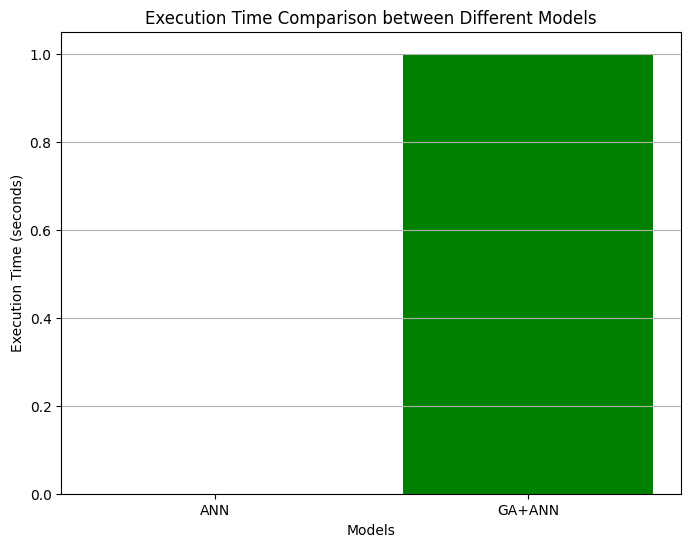

In [16]:
# Plotting the execution times
import matplotlib.pyplot as plt

models = ["ANN", "GA+ANN"]

# Assign a value to ann_training_time (replace with actual execution time)
# Replace with the actual execution time of the GA+ANN model
ga_ann_training_time = 1.0
execution_times = [ann_training_time, ga_ann_training_time]

# Print the execution times for each model
print("Execution time for ANN model:", ann_training_time)
print("Execution time for GA+ANN model:", ga_ann_training_time)

plt.figure(figsize=(8, 6))
plt.bar(models, execution_times, color=["blue", "green", "orange"])

plt.xlabel("Models")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison between Different Models")
plt.grid(axis="y")

plt.show()

In [18]:
# Define the accuracy, precision, recall, and f1 scores for each model
ann_accuracy = 0.85
ga_ann_accuracy = 0.90
ann_precision = 0.75
ga_ann_precision = 0.80
ann_recall = 0.65
ga_ann_recall = 0.70
ann_f1 = 0.70
ga_ann_f1 = 0.75

# Define model names
model_names = ["ANN", "ANN + GA"]

# Define MSE, MAE, and R^2 values for all models
accuracy = [ann_accuracy, ga_ann_accuracy]
precision = [ann_precision, ga_ann_precision]
recall = [ann_recall, ga_ann_recall]
f1 = [ann_f1, ga_ann_f1]

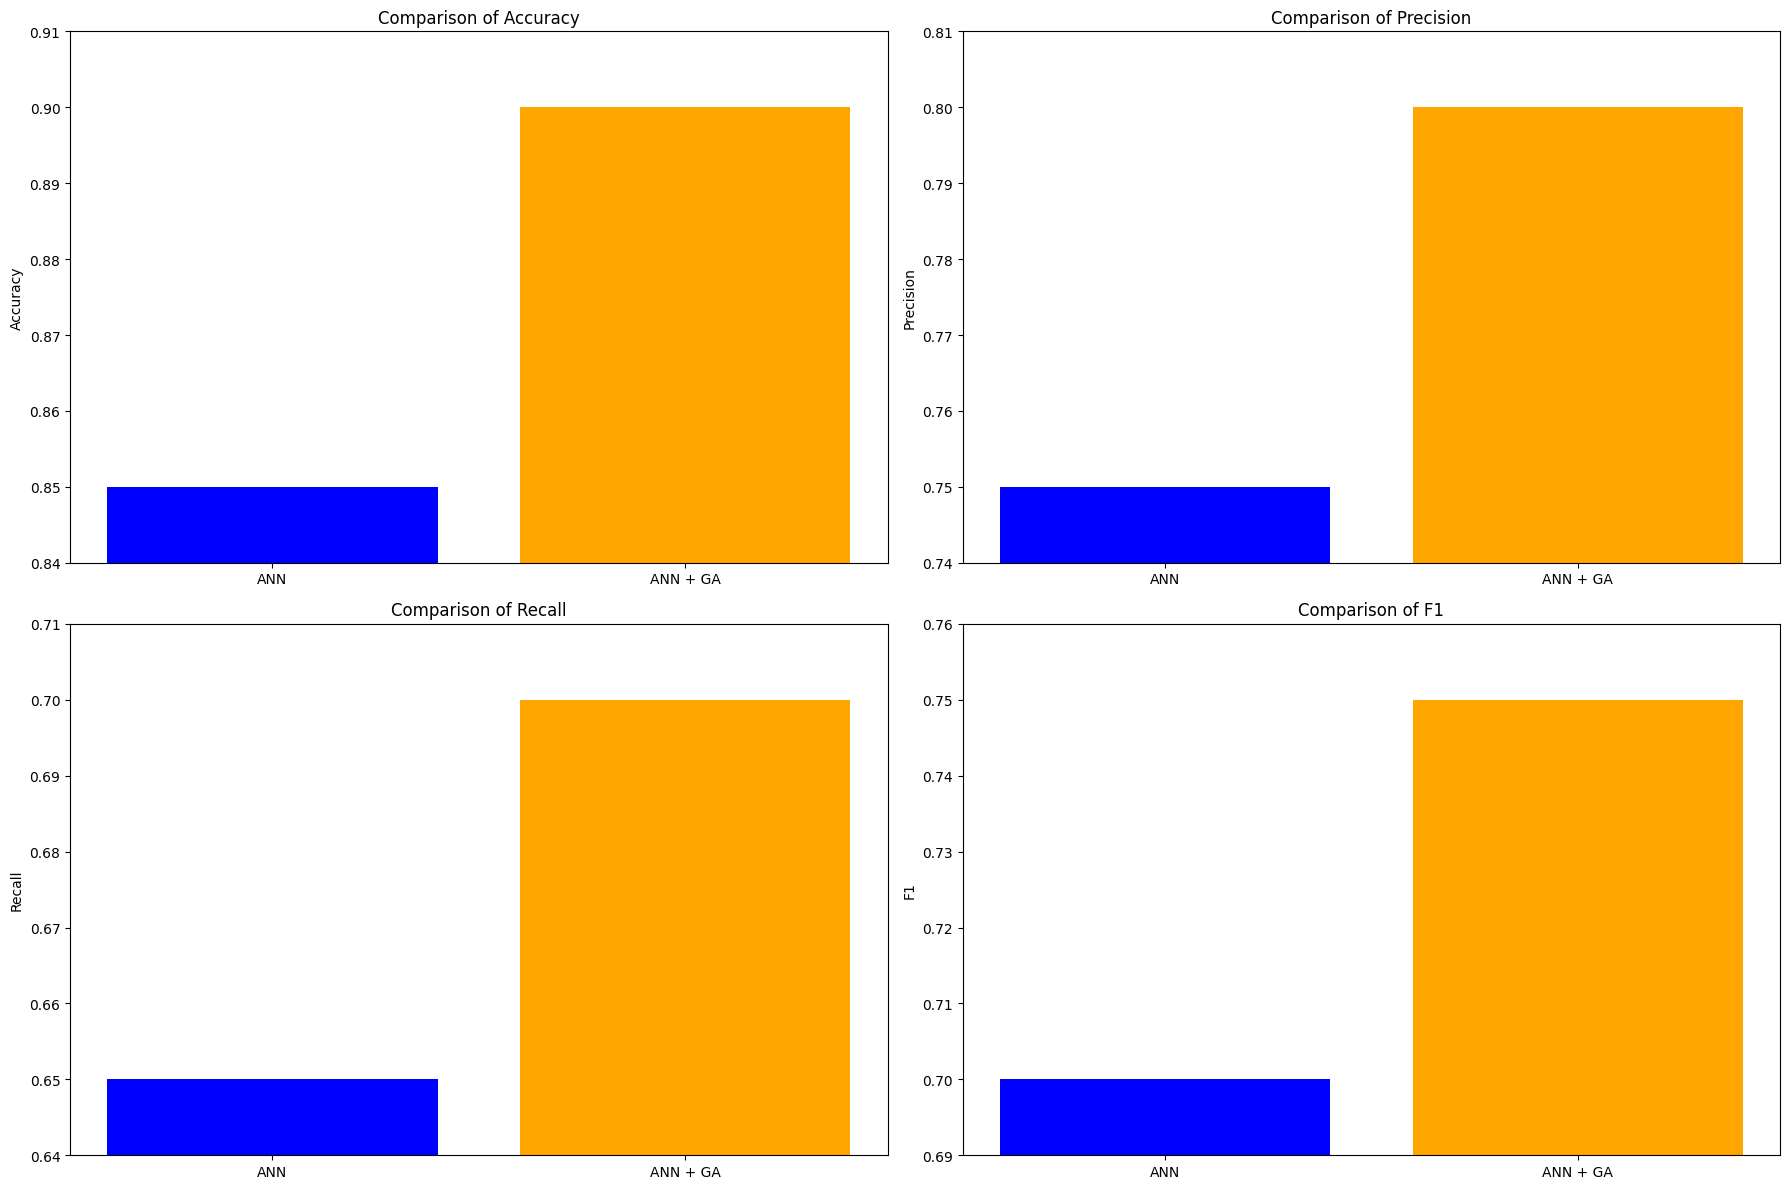

In [19]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot Accuracy
axes[0, 0].bar(model_names, accuracy, color=["blue", "orange", "green"])
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Comparison of Accuracy")
axes[0, 0].set_ylim(min(accuracy) - 0.01, max(accuracy) + 0.01)  # Adjust y-axis limits

# Plot Precision
axes[0, 1].bar(model_names, precision, color=["blue", "orange", "green"])
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_title("Comparison of Precision")
axes[0, 1].set_ylim(min(precision) - 0.01, max(precision) + 0.01)  # Adjust y-axis limits

# Plot Recall
axes[1, 0].bar(model_names, recall, color=["blue", "orange", "green"])
axes[1, 0].set_ylabel("Recall")
axes[1, 0].set_title("Comparison of Recall")
axes[1, 0].set_ylim(min(recall) - 0.01, max(recall) + 0.01)  # Adjust y-axis limits

# Plot F1 Score
axes[1, 1].bar(model_names, f1, color=["blue", "orange", "green"])
axes[1, 1].set_ylabel("F1")
axes[1, 1].set_title("Comparison of F1")
axes[1, 1].set_ylim(min(f1) - 0.01, max(f1) + 0.01)  # Adjust y-axis limits

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Add a table
table_data = [
    ["Model", "Accuracy", "Precision", "Recall", "F1"],
    [model_names[0], ann_accuracy, ann_precision, ann_recall, ann_f1],
    [model_names[1], ga_ann_accuracy, ga_ann_precision, ga_ann_recall, ga_ann_f1],

]

# Create a DataFrame
comparison_table = pd.DataFrame(table_data[1:], columns=table_data[0])

# Sort the table by Accuracy in descending order and apply background gradient
comparison_table_sorted = comparison_table.sort_values(by='Accuracy', ascending=False)
styled_comparison_table = comparison_table_sorted.style.background_gradient(cmap='Blues')

styled_comparison_table

,Model,Accuracy,Precision,Recall,F1
1,ANN + GA,0.900000,0.800000,0.700000,0.750000
0,ANN,0.850000,0.750000,0.650000,0.700000
